# 해시태그 데이터로 워드클라우드 만들기

In [31]:
!sudo apt-get install -y fonts-nanum > /dev/null
!sudo fc-cache -fv > /dev/null
!rm ~/.cache/matplotlib -rf > /dev/null

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스.csv


In [3]:
import pandas as pd

In [5]:
raw_df = pd.read_csv('제주핫플레이스.csv')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  8369 non-null   object
 1   date     8369 non-null   object
 2   like     8369 non-null   object
 3   place    2845 non-null   object
 4   tags     8369 non-null   object
dtypes: object(5)
memory usage: 327.0+ KB


In [6]:
raw_df.head(3).tags

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [21]:
tags_total = []
for tags in raw_df.tags:
    tags = tags[2:-2].split("', ")
    tags_total.extend(tags)

In [22]:
tags_total[:10]

['#제주핫플레이스',
 "'#제주여행",
 "'#제주여행",
 "'#제주도여행",
 "'#제주가볼만한곳",
 "'#제주도핫플",
 "'#제주여행코스",
 "'#제주공항",
 "'#제주도맛집",
 "'#제주맛집"]

In [23]:
tags_total = [x.lstrip("#'") for x in tags_total]
tags_total[:10]

['제주핫플레이스',
 '제주여행',
 '제주여행',
 '제주도여행',
 '제주가볼만한곳',
 '제주도핫플',
 '제주여행코스',
 '제주공항',
 '제주도맛집',
 '제주맛집']

### 해시탤그 출현 빈도
- collections 모듈

In [10]:
from collections import Counter, OrderedDict

In [16]:
s = 'A quick brown fox jumps over the lazy dog'
print(Counter(s))

Counter({' ': 8, 'o': 4, 'u': 2, 'r': 2, 'e': 2, 'A': 1, 'q': 1, 'i': 1, 'c': 1, 'k': 1, 'b': 1, 'w': 1, 'n': 1, 'f': 1, 'x': 1, 'j': 1, 'm': 1, 'p': 1, 's': 1, 'v': 1, 't': 1, 'h': 1, 'l': 1, 'a': 1, 'z': 1, 'y': 1, 'd': 1, 'g': 1})


In [25]:
print(OrderedDict((Counter(s))))

OrderedDict([('A', 1), (' ', 8), ('q', 1), ('u', 2), ('i', 1), ('c', 1), ('k', 1), ('b', 1), ('r', 2), ('o', 4), ('w', 1), ('n', 1), ('f', 1), ('x', 1), ('j', 1), ('m', 1), ('p', 1), ('s', 1), ('v', 1), ('e', 2), ('t', 1), ('h', 1), ('l', 1), ('a', 1), ('z', 1), ('y', 1), ('d', 1), ('g', 1)])


In [27]:
od = OrderedDict()
od['x'] = 1
od['y'] = 2
od['z'] = 3

od

OrderedDict([('x', 1), ('y', 2), ('z', 3)])

In [30]:
for key, value in od.items():
    print(key, value, sep=', ')

x, 1
y, 2
z, 3


- 해시태그 빈도 집계

In [11]:
tag_counts = Counter(tags_total)

In [14]:
# Top 50
tag_counts.most_common(50)

[('제주맛집', 3412),
 ('제주도맛집', 3149),
 ('제주여행', 3020),
 ('제주관광', 2827),
 ('제주도', 2053),
 ('제주', 1538),
 ('제주도여행', 1455),
 ('서귀포맛집', 1330),
 ('제주도가볼만한곳', 1014),
 ('제주핫플레이스', 835),
 ('서귀포', 825),
 ('jeju', 749),
 ('일상', 701),
 ('제주흑돼지맛집', 685),
 ('제주맛집추천', 675),
 ('제주도흑돼지맛집', 669),
 ('제주도흑돼지', 663),
 ('성산일출봉', 650),
 ('제주흑돼지', 648),
 ('협재맛집', 602),
 ('제주카페', 600),
 ('제주도그램', 594),
 ('서귀포흑돼지맛집', 593),
 ('', 587),
 ('서귀포흑돼지', 577),
 ('제주도민', 570),
 ('섭지코지', 556),
 ('성산일출봉맛집', 545),
 ('섭지코지맛집', 511),
 ('선팔', 503),
 ('제주가볼만한곳', 497),
 ('통갈치구이', 494),
 ('제주통갈치구이', 485),
 ('제주핫플', 483),
 ('제주살이', 480),
 ('제주서귀포맛집', 479),
 ('제주도민맛집', 477),
 ('여행스타그램', 472),
 ('제주반영구', 440),
 ('제주도관광', 440),
 ('여행', 436),
 ('제주눈썹문신', 434),
 ('서귀포눈썹문신', 420),
 ('제주시', 419),
 ('제주스타그램', 408),
 ('반영구', 405),
 ('눈썹문신', 405),
 ('중문맛집', 404),
 ('제주일상', 398),
 ('제주자연눈썹', 397)]

In [24]:
# 데이터 정제하기
stopwords = ['juju','일상','','제주','제주도','선팔','제주눈썹문신','서귀포눈썹문신','반영구','눈썹문신','제주자연눈썹',\
             '서귀포남자눈썹문신', '서귀포반영구', '서귀포자연눈썹', '서귀포속눈썹', '제주속눈썹', '제주남자눈썹문신']
'''tag_total_refined = []
for tag in tag_total:
    if tag not in stopwords:
        tag_total_refined.append(tag)'''

tags_total = [tag for tag in tags_total if tag not in stopwords]

tag_counts = Counter(tags_total)
tag_counts.most_common(50)

[('제주맛집', 3412),
 ('제주도맛집', 3149),
 ('제주여행', 3020),
 ('제주관광', 2827),
 ('제주도여행', 1455),
 ('서귀포맛집', 1330),
 ('제주도가볼만한곳', 1014),
 ('제주핫플레이스', 835),
 ('서귀포', 825),
 ('jeju', 749),
 ('제주흑돼지맛집', 685),
 ('제주맛집추천', 675),
 ('제주도흑돼지맛집', 669),
 ('제주도흑돼지', 663),
 ('성산일출봉', 650),
 ('제주흑돼지', 648),
 ('협재맛집', 602),
 ('제주카페', 600),
 ('제주도그램', 594),
 ('서귀포흑돼지맛집', 593),
 ('서귀포흑돼지', 577),
 ('제주도민', 570),
 ('섭지코지', 556),
 ('성산일출봉맛집', 545),
 ('섭지코지맛집', 511),
 ('제주가볼만한곳', 497),
 ('통갈치구이', 494),
 ('제주통갈치구이', 485),
 ('제주핫플', 483),
 ('제주살이', 480),
 ('제주서귀포맛집', 479),
 ('제주도민맛집', 477),
 ('여행스타그램', 472),
 ('제주반영구', 440),
 ('제주도관광', 440),
 ('여행', 436),
 ('제주시', 419),
 ('제주스타그램', 408),
 ('중문맛집', 404),
 ('제주일상', 398),
 ('먹스타그램', 395),
 ('맞팔', 388),
 ('카멜리아힐', 379),
 ('중문흑돼지맛집', 377),
 ('소통', 374),
 ('애월맛집', 373),
 ('daily', 360),
 ('제주메이크업', 358),
 ('가족여행', 356),
 ('제주도여행코스', 350)]

## 워드 클라우드 만들기

In [26]:
from wordcloud import WordCloud

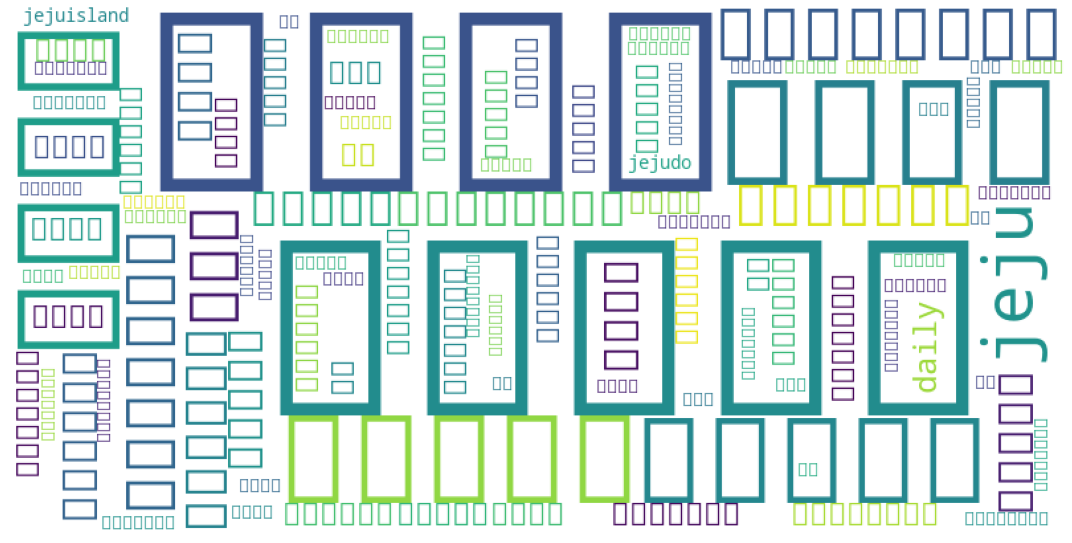

In [29]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(background_color='white', max_words=100, relative_scaling=0.3, 
                      width=800, height=400).generate_from_frequencies(tag_counts)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [30]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'